[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/juliopez/Taller-Fundamentos-Data-Science-Python/blob/main/04_Ejercicios_Practicos/04_Sesion4_Guion_Practica.ipynb)

# 🎯 Actividad Práctica — Sesión 4 (45–50 min)

En este notebook vamos a experimentar con **redes neuronales densas** para aproximar una función **no lineal**.

Veremos tres modelos:

1. Un modelo **lineal** (sin capa oculta) → típico **underfitting**.  
2. Un modelo de **red pequeña** → compromiso razonable entre sesgo y varianza.  
3. Un modelo de **red grande** → puede acercarse al **overfitting**.

Al final, quedan a disposción de la audiencia algunos **experimentos** para practicar entre otras cosas:
- Cambiar el número de neuronas por capa.
- Cambiar el número de capas ocultas.
- Aumentar / disminuir la cantidad de épocas.
- Agregar regularización o `Dropout`.

**Duración total sugerida:** 40 min

## Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers


## Generar datos sintéticos (función no lineal)

In [ ]:

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Generamos datos en el rango [-2, 2]
X = np.linspace(-2, 2, 400)
# Definimos una función no lineal (puedes cambiarla si quieres)
y_true = X**3 - 0.5 * X

# Agregamos ruido
ruido = np.random.normal(0, 0.5, size=X.shape)
y = y_true + ruido

# Cambiamos forma para Keras (n muestras, 1 feature)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)



Forma de X: (400, 1)
Forma de y: (400, 1)


## Dividir en train y test + visualización

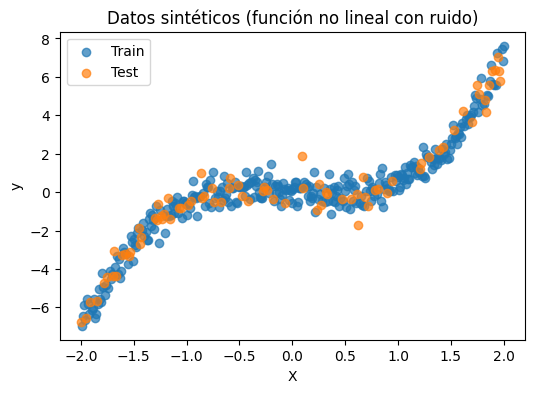

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label="Train", alpha=0.7)
plt.scatter(X_test, y_test, label="Test", alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos sintéticos (función no lineal con ruido)")
plt.legend()
plt.show()



## Función auxiliar para graficar predicciones

In [ ]:
def plot_model_predictions(model, X_train, y_train, X_test, y_test, titulo="Modelo"):
    # Creamos un grid de puntos para ver la curva suave
    X_plot = np.linspace(-2.5, 2.5, 300).reshape(-1, 1)
    y_pred_plot = model.predict(X_plot)

    plt.figure(figsize=(6,4))
    plt.scatter(X_train, y_train, label="Train", alpha=0.6)
    plt.scatter(X_test, y_test, label="Test", alpha=0.6)
    plt.plot(X_plot, y_pred_plot, label="Predicción modelo", linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(titulo)
    plt.legend()
    plt.show()

## Modelo 1: Lineal (sin capa oculta) → Underfitting



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modelo lineal
MSE Train: 2.5276
MSE Test:  3.7148
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


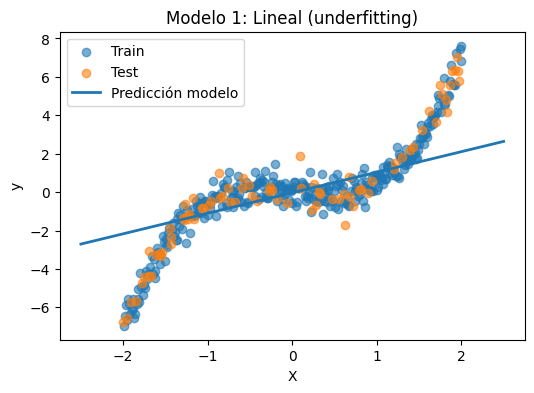

In [ ]:
# Modelo lineal: una sola capa Dense con activación lineal
model_linear = Sequential([
    Dense(1, activation="linear", input_shape=(1,))
])

model_linear.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"]
)

history_linear = model_linear.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluación
loss_train_lin, mse_train_lin = model_linear.evaluate(X_train, y_train, verbose=0)
loss_test_lin, mse_test_lin = model_linear.evaluate(X_test, y_test, verbose=0)

print("Modelo lineal")
print(f"MSE Train: {mse_train_lin:.4f}")
print(f"MSE Test:  {mse_test_lin:.4f}")

plot_model_predictions(model_linear, X_train, y_train, X_test, y_test,
                       titulo="Modelo 1: Lineal (underfitting)")



## Modelo 2: Red pequeña (1 capa oculta) → Mejor ajuste

Modelo pequeño (1 capa oculta, 16 neuronas, ReLU)
MSE Train: 0.4473
MSE Test:  0.5909
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


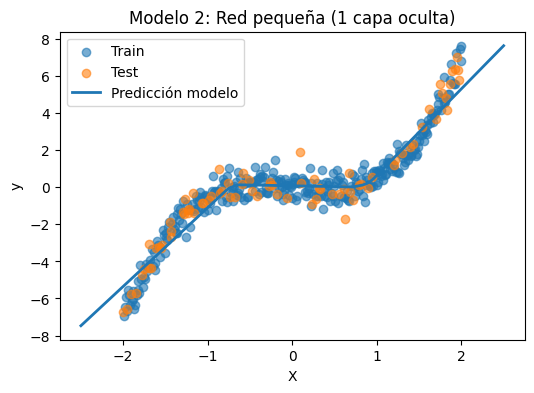

In [ ]:
# Red pequeña: 1 capa oculta con pocas neuronas
model_small = Sequential([
    Dense(16, activation="relu", input_shape=(1,)),
    Dense(1, activation="linear")
])

model_small.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"]
)

history_small = model_small.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_train_small, mse_train_small = model_small.evaluate(X_train, y_train, verbose=0)
loss_test_small, mse_test_small = model_small.evaluate(X_test, y_test, verbose=0)

print("Modelo pequeño (1 capa oculta, 16 neuronas, ReLU)")
print(f"MSE Train: {mse_train_small:.4f}")
print(f"MSE Test:  {mse_test_small:.4f}")

plot_model_predictions(model_small, X_train, y_train, X_test, y_test,
                       titulo="Modelo 2: Red pequeña (1 capa oculta)")



## Modelo 3: Red grande (múltiples capas) → posible overfitting



Modelo grande (3 capas ocultas, 64 neuronas c/u)
MSE Train: 0.2118
MSE Test:  0.2816
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


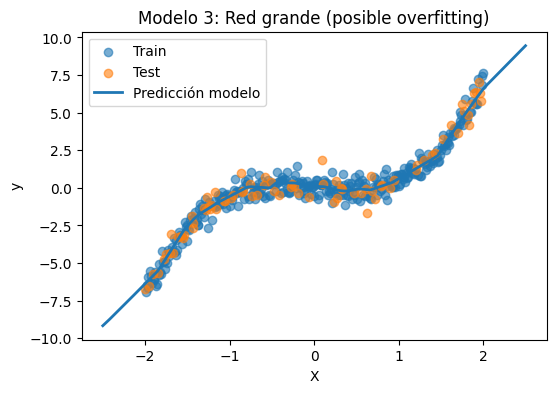

In [ ]:

# Red grande: varias capas ocultas y más neuronas
model_big = Sequential([
    Dense(64, activation="relu", input_shape=(1,)),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="linear")
])

model_big.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"]
)

history_big = model_big.fit(
    X_train, y_train,
    epochs=600,          # más épocas -> mayor riesgo de overfitting
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

loss_train_big, mse_train_big = model_big.evaluate(X_train, y_train, verbose=0)
loss_test_big, mse_test_big = model_big.evaluate(X_test, y_test, verbose=0)

print("Modelo grande (3 capas ocultas, 64 neuronas c/u)")
print(f"MSE Train: {mse_train_big:.4f}")
print(f"MSE Test:  {mse_test_big:.4f}")

plot_model_predictions(model_big, X_train, y_train, X_test, y_test,
                       titulo="Modelo 3: Red grande (posible overfitting)")


## Comparar curvas de loss

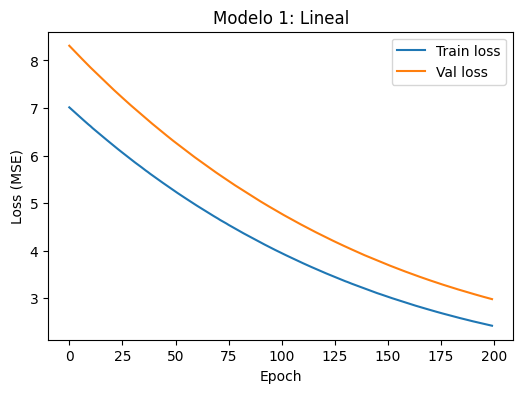

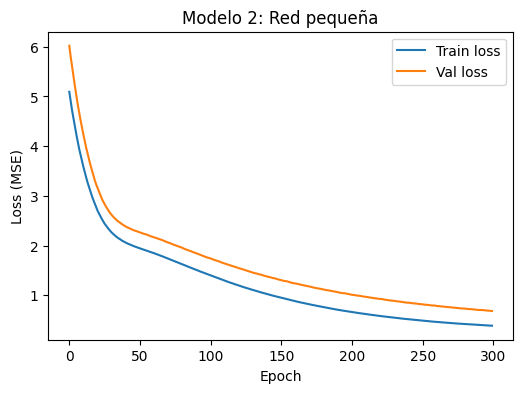

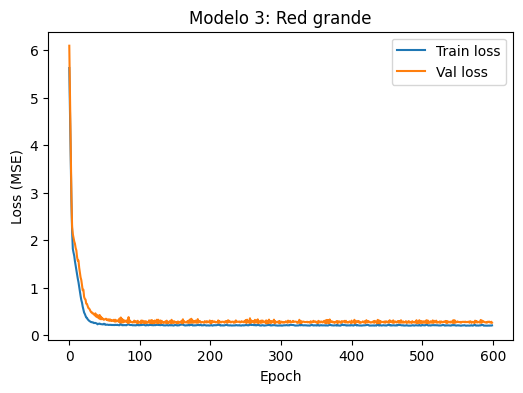

In [ ]:
def plot_history(history, titulo="Historia de entrenamiento"):
    plt.figure(figsize=(6,4))
    plt.plot(history.history["loss"], label="Train loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title(titulo)
    plt.legend()
    plt.show()

plot_history(history_linear, "Modelo 1: Lineal")
plot_history(history_small,  "Modelo 2: Red pequeña")
plot_history(history_big,    "Modelo 3: Red grande")



## Preguntas de reflexión / Desafíos

1. ¿Qué diferencias existen entre las curvas de predicción de los 3 modelos?
2. ¿En qué caso se ve **underfitting**? ¿En qué caso se insinúa **overfitting**?
3. Al comparar los valores de MSE en **train** y **test** en cada modelo:
   - ¿En cuál son más parecidos?
   - ¿En cuál hay más diferencia?

4. Relacionar las respuestas anteriores con:
   - Número de capas ocultas
   - Número de neuronas
   - Riesgo de overfitting?



## Desafíos (para experimentar)

Analizar los resultados al realizar las siguientes modificaciones (una a la vez):

- Cambiar el número de neuronas en la capa oculta del **Modelo 2** (por ejemplo, 4, 8, 32).
- Agregar una segunda capa oculta al **Modelo 2** y observar qué sucede.
- Reducir el número de épocas en el **Modelo 3** (por ejemplo, de 600 a 200).
- Agregar regularización L2 en el **Modelo 3**, por ejemplo:

```python
Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001))